In [2]:
import sys
sys.path.append('../../numpy/2D')

from utils import *
from env import *
from model import *
from matplotlib import gridspec

In [3]:
# set directory to folder with model trained with different place field parameter combinations
data_dir = "/Users/mganeshkumar/Library/CloudStorage/OneDrive-HarvardUniversity/Code/online_pf_learning/online/2D/"

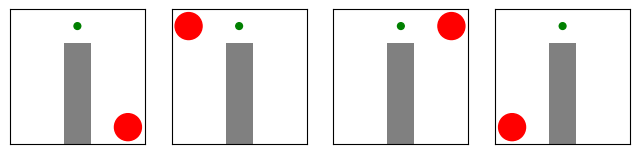

In [4]:
# plot obs

def plot_env(obscoords, goalcoord,startcoords,goalsize=0.1, ax=None):
    if ax is None:
        f,ax = plt.subplots()

    L = obscoords[0]
    T = obscoords[3]
    dfL = obscoords[1]-obscoords[0]
    dfT = obscoords[2]-obscoords[3]

    ax.add_patch(Rectangle((L,T), dfL, dfT, facecolor='grey'))  # top left

    circle = plt.Circle(xy=goalcoord, radius=goalsize*2, color='r')

    ax.add_patch(circle)
    ax.axis([-1, 1,-1, 1])
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    for startcoord in startcoords:
        circle = plt.Circle(xy=startcoord, radius=0.05, color='g')
        ax.add_patch(circle)


goals = [[0.75,-0.75],[-0.75,0.75],[0.75,0.75],[-0.75,-0.75]]
obs = [-0.2,0.2,-1,0.5]
start = [[0.0,0.75]]

f,axs = plt.subplots(1,4,figsize=(8,3))

for g,goal in enumerate(goals):
    plot_env(obs,goal,start,ax=axs[g])


# f.savefig('./svgs/2D_rlocs.svg')

In [ ]:
seeds = 30
episodes = 50000
goalcoords = [[0.75,-0.75],[-0.75,0.75],[0.75,0.75],[-0.75,-0.75]]
total_episodes = 50000 * len(goalcoords)
trials = np.arange(total_episodes)[::100]

noises = [0.0, 1e-4, 2.5e-4, 5e-4, 1e-3]
npcs = [8, 12, 16, 24]
sigmas = [0.025, 0.05, 0.1]

[cum_rewards] = saveload(data_dir+f'./comp_data/2D_G_noise', 1, 'load')
print(cum_rewards.shape)
print("Contains 0.0:", (cum_rewards == 0.0).any()) 
print("Contains NaN", np.isnan(cum_rewards).any()) 



(4, 5, 30, 2000)
Contains 0.0: True
Contains NaN True


52.07688615113168 9.41729194573879
$N=8, \xi=0.0$  --> 18.635$
52.091134430793375 9.508464526205517
$N=8, \xi=0.0001$  --> 18.070$
51.61366609947761 9.541549247679352
$N=8, \xi=0.00025$  --> 22.511$
51.92667008395219 9.409506768829928
$N=8, \xi=0.0005$  --> 25.462$
46.66970544015112 9.54310452671498
$N=8, \xi=0.001$  --> 25.683$
52.07889700133299 9.628287945111103
$N=12, \xi=0.0$  --> 19.950$
52.01325067456504 9.62628298460028
$N=12, \xi=0.0001$  --> 20.855$
51.827425030324605 9.638841810661813
$N=12, \xi=0.00025$  --> 22.744$
51.84254057307177 9.448705588842488
$N=12, \xi=0.0005$  --> 29.226$
51.66618030953613 9.547802382906793
$N=12, \xi=0.001$  --> 32.704$
52.01635251362987 9.560427459176964
$N=16, \xi=0.0$  --> 18.144$
52.01481372025729 9.580534950846236
$N=16, \xi=0.0001$  --> 21.329$
52.01930952618275 9.541388156930212
$N=16, \xi=0.00025$  --> 22.423$
51.902128141196485 9.392578677856989
$N=16, \xi=0.0005$  --> 28.903$
52.370754381274175 9.529620073117066
$N=16, \xi=0.001$  --> 3

/var/folders/9w/2t7dk80j0vncsnz93dbrg1080000gp/T/ipykernel_97237/3399284207.py:18: RuntimeWarning: Mean of empty slice
  allg[n,ns] = np.nanmean(comb,axis=1)


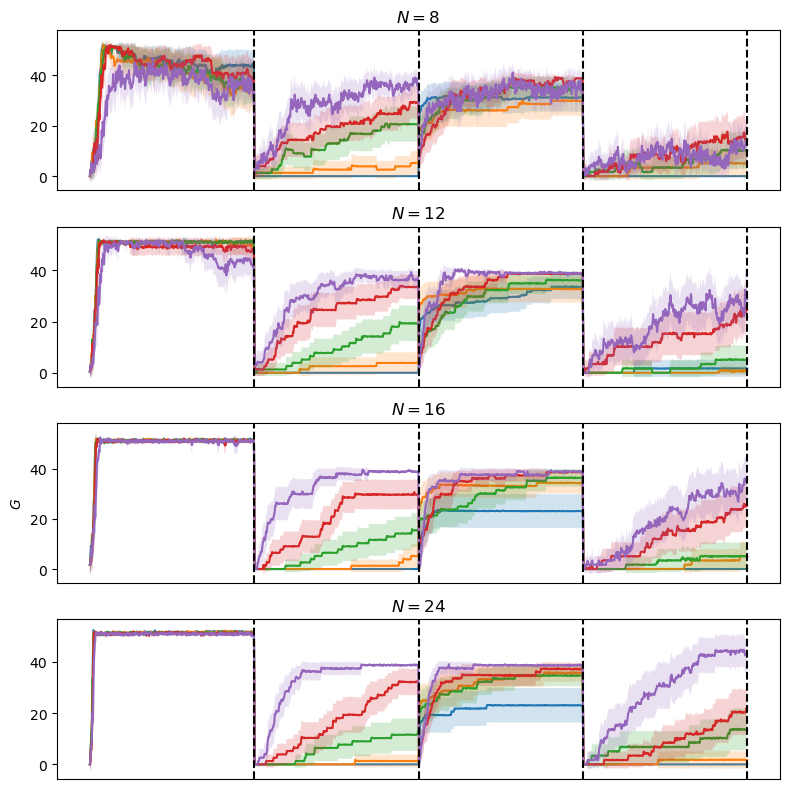

In [8]:
window = 2

allg = np.zeros([len(npcs), len(noises), seeds])

f, axs = plt.subplots(4,1,figsize=(8, 8))

for n,npc in enumerate(npcs):
        
    ax = axs[n]

    for ns, noise in enumerate(noises):

        comb = cum_rewards[n,ns]
        meang = moving_average(np.nanmean(comb, axis=0),window)
        ci = 1.96* np.nanstd(comb,axis=0)/np.sqrt(comb.shape[0])
        print(meang.max(), ci.max())

        allg[n,ns] = np.nanmean(comb,axis=1)

        ax.plot(trials, meang, label=f"$\sigma_{{noise}}={noise}$", zorder=2)
        ax.fill_between(trials, meang- ci, meang + ci, alpha=0.2, zorder=2)
        print(f"$N={npc}, \\xi={noise}$  --> {np.nanmean(meang):.3f}$")

    ax.set_title(f'$N={npc}$')

    if n == 4:
        ax.set_xlabel(f'$T$')
    else:
        ax.set_xticks([])
    if n == 2:
        ax.set_ylabel('$G$')

    # Adjust annotation for each goalcoord
    for i, coord in enumerate(goalcoords):
        ax.axvline(episodes * (i + 1), color='k', linestyle='--', zorder=3)
        # x_pos = (i * episodes + episodes // 2)
        # y_pos = ax.get_ylim()[1] * 1.2  # Placing text just below the maximum y-axis limit
        # ax.text(x_pos, y_pos, f'$x_r={coord}$', ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

    # Place the legend on the right side
    # ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fontsize=8, frameon=True)

    f.tight_layout()

    # f.savefig(f'./svgs/drift_G_reward.svg', dpi=300)

(5, 30, 2000) (5, 30)
$N=24, \xi=0.0$  --> 18.717$
$N=24, \xi=0.0001$  --> 20.306$
$N=24, \xi=0.00025$  --> 22.890$
$N=24, \xi=0.0005$  --> 27.663$
$N=24, \xi=0.001$  --> 32.313$


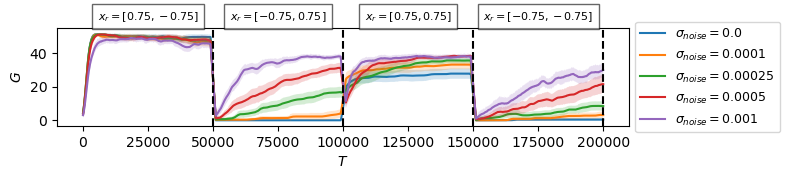

In [9]:
# average over npc and sigma

cr = np.nanmean(cum_rewards,axis=0)
ag = np.nanmean(allg,axis=0)
print(cr.shape, ag.shape)

window = 20

f, ax = plt.subplots(1,1,figsize=(8, 2))

for ns, noise in enumerate(noises):

    comb = cr[ns]
    meang = moving_average(np.nanmean(comb, axis=0),window)
    ci = 1.96* np.nanstd(comb,axis=0)/np.sqrt(comb.shape[0])

    ax.plot(trials, meang, label=f"$\sigma_{{noise}}={noise}$", zorder=2)
    ax.fill_between(trials, meang- ci, meang + ci, alpha=0.2, zorder=2)
    print(f"$N={npc}, \\xi={noise}$  --> {np.nanmean(meang):.3f}$")

ax.set_ylabel('$G$')
ax.set_xlabel(f'$T$')

# Adjust annotation for each goalcoord
for i, coord in enumerate(goalcoords):
    ax.axvline(episodes * (i + 1), color='k', linestyle='--', zorder=3)
    x_pos = (i * episodes + episodes // 2)
    y_pos = ax.get_ylim()[1] * 1.2  # Placing text just below the maximum y-axis limit
    ax.text(x_pos, y_pos, f'$x_r={coord}$', ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

# Place the legend on the right side
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fontsize=9, frameon=True)

f.tight_layout()
# f.savefig(f'./svgs/drift_G_reward_all.svg')


## obstacle change

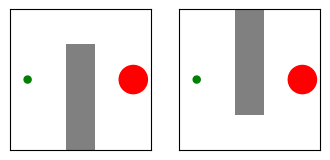

In [10]:
def plot_obs(obscoords, goalcoord,startcoords,goalsize=0.1, ax=None):
    if ax is None:
        f,ax = plt.subplots()

    L = obscoords[0]
    T = obscoords[3]
    dfL = obscoords[1]-obscoords[0]
    dfT = obscoords[2]-obscoords[3]

    ax.add_patch(Rectangle((L,T), dfL, dfT, facecolor='grey'))  # top left

    circle = plt.Circle(xy=goalcoord, radius=goalsize*2, color='r')

    ax.add_patch(circle)
    ax.axis([-1, 1,-1, 1])
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])

    for startcoord in startcoords:
        circle = plt.Circle(xy=startcoord, radius=0.05, color='g')
        ax.add_patch(circle)


goal = [0.75,0.0]
obss = [[-0.2,0.2,-1,0.5], [-0.2,0.2,-0.5,1.0]]
start = [[-0.75,0.0]]

f,axs = plt.subplots(1,2,figsize=(4,3))

for o,obs in enumerate(obss):
    plot_env(obs,goal,start,ax=axs[o])


# f.savefig('./svgs/2D_obs.svg')

In [11]:
seeds = 30
episodes = 50000
obscoords = [[-0.2,0.2,-1,0.5], [-0.2,0.2,-0.5,1.0]]
total_episodes = 50000 * len(obscoords)
trials = np.arange(total_episodes)[::100]

noises = [0.0, 1e-4, 2.5e-4, 5e-4, 1e-3]
npcs = [8, 12, 16, 24]

[cum_rewards] = saveload(data_dir+f'./comp_data/2D_G_noise_obs', 1, 'load')
print(cum_rewards.shape)
print("Contains 0.0:", (cum_rewards == 0.0).any()) 
print("Contains NaN", np.isnan(cum_rewards).any()) 



(4, 5, 30, 1000)
Contains 0.0: True
Contains NaN False


$N=8, \xi=0.0$  --> 21.871$
$N=8, \xi=0.0001$  --> 20.757$
$N=8, \xi=0.00025$  --> 19.602$
$N=8, \xi=0.0005$  --> 9.131$
$N=8, \xi=0.001$  --> 1.096$
$N=12, \xi=0.0$  --> 23.753$
$N=12, \xi=0.0001$  --> 24.544$
$N=12, \xi=0.00025$  --> 26.612$
$N=12, \xi=0.0005$  --> 24.363$
$N=12, \xi=0.001$  --> 1.465$
$N=16, \xi=0.0$  --> 24.033$
$N=16, \xi=0.0001$  --> 23.891$
$N=16, \xi=0.00025$  --> 28.254$
$N=16, \xi=0.0005$  --> 30.932$
$N=16, \xi=0.001$  --> 3.920$
$N=24, \xi=0.0$  --> 24.775$
$N=24, \xi=0.0001$  --> 25.618$
$N=24, \xi=0.00025$  --> 26.665$
$N=24, \xi=0.0005$  --> 34.888$
$N=24, \xi=0.001$  --> 22.552$


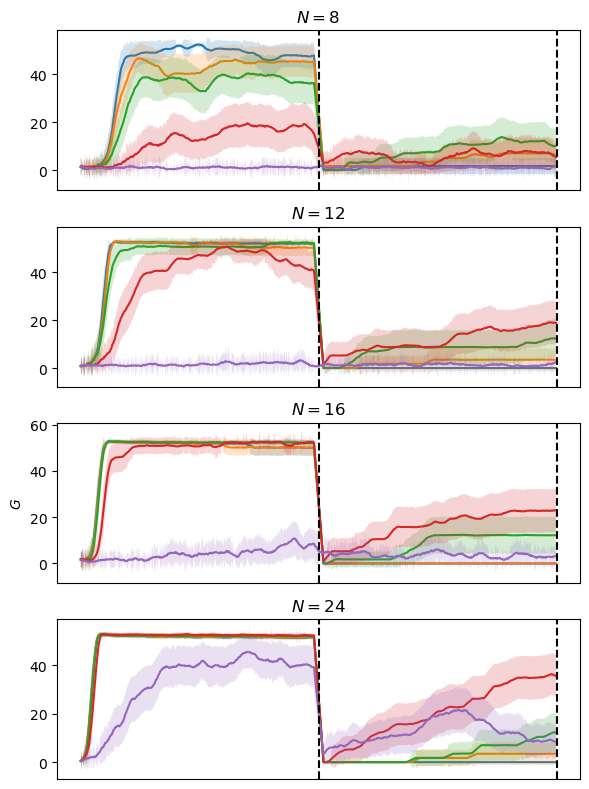

In [12]:
window = 20

allg = np.zeros([len(npcs), len(noises), seeds])

f, axs = plt.subplots(4,1,figsize=(6, 8))

for n,npc in enumerate(npcs):
        
    ax = axs[n]

    for ns, noise in enumerate(noises):

        comb = cum_rewards[n,ns]
        meang = moving_average(np.nanmean(comb, axis=0),window)
        ci = 1.96* np.nanstd(comb,axis=0)/np.sqrt(comb.shape[0])

        allg[n,ns] = np.nanmean(comb,axis=1)

        ax.plot(trials, meang, label=f"$\sigma_{{noise}}={noise}$", zorder=2)
        ax.fill_between(trials, meang- ci, meang + ci, alpha=0.2, zorder=2)
        print(f"$N={npc}, \\xi={noise}$  --> {np.nanmean(meang):.3f}$")

    ax.set_title(f'$N={npc}$')

    if n == 4:
        ax.set_xlabel(f'$T$')
    else:
        ax.set_xticks([])
    if n == 2:
        ax.set_ylabel('$G$')

    # Adjust annotation for each goalcoord
    for i, coord in enumerate(obscoords):
        ax.axvline(episodes * (i + 1), color='k', linestyle='--', zorder=3)
        # x_pos = (i * episodes + episodes // 2)
        # y_pos = ax.get_ylim()[1] * 1.2  # Placing text just below the maximum y-axis limit
        # ax.text(x_pos, y_pos, f'$x_r={coord}$', ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

    # Place the legend on the right side
    # ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fontsize=8, frameon=True)
    f.tight_layout()

    # f.savefig(f'./svgs/drift_G_obs.svg', dpi=300)

(5, 30, 1000) (5, 30)
$N=24, \xi=0.0$  --> 23.608$
$N=24, \xi=0.0001$  --> 23.702$
$N=24, \xi=0.00025$  --> 25.284$
$N=24, \xi=0.0005$  --> 24.828$
$N=24, \xi=0.001$  --> 7.258$


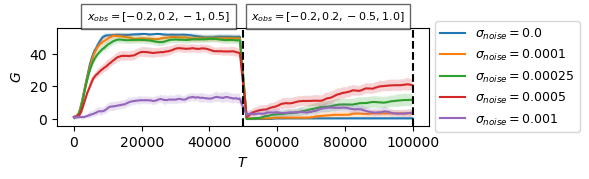

In [13]:
# average over npc and sigma

cr = np.nanmean(cum_rewards,axis=0)
ag = np.nanmean(allg,axis=0)
print(cr.shape, ag.shape)

window = 20

f, ax = plt.subplots(1,1,figsize=(6, 2))

for ns, noise in enumerate(noises):

    comb = cr[ns]
    meang = moving_average(np.nanmean(comb, axis=0),window)
    ci = 1.96* np.nanstd(comb,axis=0)/np.sqrt(comb.shape[0])

    ax.plot(trials, meang, label=f"$\sigma_{{noise}}={noise}$", zorder=2)
    ax.fill_between(trials, meang- ci, meang + ci, alpha=0.2, zorder=2)
    print(f"$N={npc}, \\xi={noise}$  --> {np.nanmean(meang):.3f}$")

ax.set_ylabel('$G$')
ax.set_xlabel(f'$T$')

# Adjust annotation for each goalcoord
for i, coord in enumerate(obscoords):
    ax.axvline(episodes * (i + 1), color='k', linestyle='--', zorder=3)
    x_pos = (i * episodes + episodes // 2)
    y_pos = ax.get_ylim()[1] * 1.2  # Placing text just below the maximum y-axis limit
    ax.text(x_pos, y_pos, f'$x_{{obs}}={coord}$', ha='center', va='top', fontsize=8, bbox=dict(facecolor='white', alpha=0.6))

# Place the legend on the right side
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), ncol=1, fontsize=9, frameon=True)

f.tight_layout()
# f.savefig(f'./svgs/drift_G_obs_all.svg')
